Лабораторна робота №1
Варіант 7

In [90]:
import os 
import time
import numpy  as np
from PIL import Image
import random 
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.pylab as plt

import scipy
from scipy import stats
from scipy.stats import iqr
from scipy.stats import skew,kurtosis

In [32]:
path = '.../downloads/mirflickr/im'
folder = os.path.join(os.getcwd(), 'mirflickr/')
images_sample = []
for i in random.sample(range(6,25001),250):
    images_sample.append(path + str(i) + '.jpg')
columns = ['num',
           'channel',
           'max',
           'min',
           'matspod',
           'disp',
           'median',
           'quart',
           'skew',
           'kurt',
           'data']

1. Сформувати тестову вибірку зображень з вихідного пакета;
2. Для кожного каналу кольору кожного зображення з тестового пакета обчислити наступні характеристики: a. Максимальна / мінімальне значення; b. Математичне сподівання і дисперсію; c. Медіану значень, інтерквартільний розмах; d. Коефіцієнти асиметрії та ексцесу (нормалізований);

In [55]:
def do_open(file):  
    im = Image.open(file)
    return np.array(im)

def get_sample():
    t = time.time() 
    np_arrays = map(do_open, images_sample)
    array = [i for i in np_arrays]
    return array

def get_df(image):
    values = []
    for i in range(len(image)):
        for channel in range(3):
            channel_img = image[i][:,:,channel]
            values.append(list((random.sample(range(6,25001),250)[i], channel,
                                channel_img.max(),channel_img.min(), np.mean(channel_img),np.var(channel_img),
                                np.median(channel_img), iqr(channel_img), skew(channel_img, None), kurtosis(channel_img, None),
                                channel_img)))
    
    return pd.DataFrame(values, columns=columns)

In [56]:
array = get_sample()
df = get_df(array)
df

,num,channel,max,min,matspod,disp,median,quart,skew,kurt,data
0,802,0,255,0,76.140370,3148.835962,65.0,74.0,0.987597,0.855673,"[[4, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 3, 3, 3, 4,..."
1,17076,1,255,0,84.700496,2920.827855,92.0,92.0,0.131453,-0.430640,"[[74, 72, 72, 72, 72, 73, 73, 73, 71, 72, 71, ..."
2,22160,2,255,0,101.674734,5810.870035,136.0,154.0,-0.103828,-1.672457,"[[143, 141, 141, 141, 138, 139, 139, 139, 141,..."
3,22825,0,236,0,93.605123,3065.088787,74.0,91.0,0.773764,-0.756842,"[[53, 53, 53, 53, 53, 53, 53, 53, 54, 54, 54, ..."
4,7379,1,206,0,101.440751,835.441132,97.0,29.0,0.858025,0.803650,"[[75, 75, 75, 75, 75, 75, 75, 75, 75, 72, 72, ..."
...,...,...,...,...,...,...,...,...,...,...,...
745,5985,1,255,0,131.806571,1600.225625,129.0,57.0,0.053029,-0.317685,"[[197, 192, 190, 191, 194, 192, 188, 191, 192,..."
746,24084,2,255,0,136.949883,1756.718155,133.0,56.0,-0.215993,-0.062556,"[[191, 194, 200, 197, 193, 191, 195, 202, 191,..."
747,5550,0,255,0,108.493773,5966.878682,87.0,110.0,0.530011,-0.937659,"[[3, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,..."
748,14693,1,255,0,102.541551,5984.262199,76.0,111.0,0.623216,-0.891433,"[[3, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,..."


3. Для кожного каналу кольору кожного зображення з тестового пакета побудувати гістограму значень яскравості пікселів;

In [77]:
def get_hist(m, n):
        
    plt.figure(figsize=(12,9))
    if n == 0:
        print('red')
    elif n == 1:
        print('green')
    else:
        print('blue')
    plt.subplot(m),plt.hist(df.loc[df['channel'] == n]['data'])
    plt.show()
    
    return X, Y

red


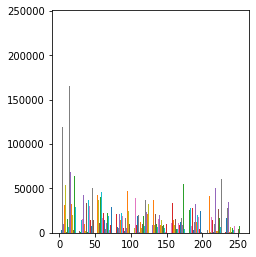

green


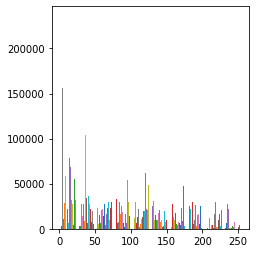

blue


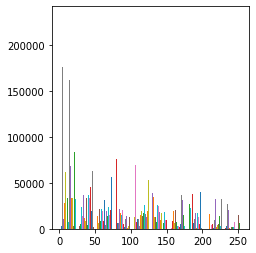

In [78]:
r_hist = get_hist(231, 0)
g_hist = get_hist(232, 1)
b_hist = get_hist(233, 2)

4. Провести апроксимацію отриманих гістограм з використанням відомих імовірнісних розподілів, визначити найкращу апроксимацію;

In [95]:
def get_approximate():   
    
    hist_data = df.loc[df['channel'] == 0]['data']
    test = hist_data[0]
    X,Y = sns.distplot(np.ravel(test)).get_lines()[0].get_data()
    
    return test, X, Y

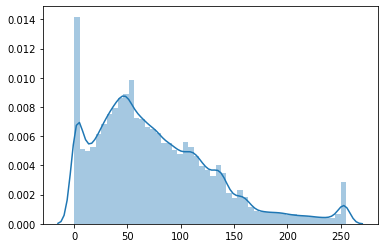

In [96]:
test, X, Y = get_approximate()

5. Побудувати розподіл типів використаних імовірнісних розподілів для яких досягається мінімальне значення помилки апроксимації з п.4.

In [108]:
def get_best(test):
    
    test = np.ravel(test) 
    x_min, _max = min(plt.xticks()[0] ), max(plt.xticks()[0] )  
    m, s = stats.norm.fit((X,Y)) 
    do_norm = stats.norm.pdf(np.linspace(0, 255, len(X)), m, s)
    plt.plot(np.linspace(0, 255, len(X)), do_norm, label='Norm',color = 'grey')
    plt.plot(X,Y,color = 'black',linewidth = 4)
    plt.plot(np.linspace(0, 255, len(X)), do_norm, label='Norm')
    ag,bg,cg = stats.gamma.fit((X,Y))  
    do_gamma = stats.gamma.pdf(np.linspace(0, 255, len(X)), ag, bg,cg)  
    plt.plot(np.linspace(0, 255, len(X)), do_gamma, label='Gamma',color = 'blue')
    ab,bb,cb,db = stats.beta.fit((X,Y))
    do_betta = stats.beta.pdf(np.linspace(0, 255, len(X)), ab, bb,cb, db)  
    plt.plot(np.linspace(0, 255, len(X)), do_betta, label='Beta',color = 'red')
    plt.show()

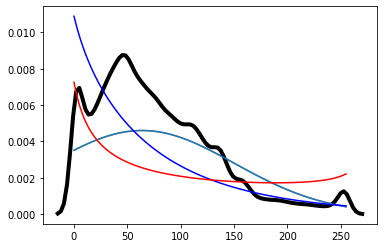

In [109]:
get_best(test)